Importing necessary Libraries

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
#Load the digits dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [3]:
#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Create a pipeline with scaling and SVC
pipe = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
param_grid = {
    'svc__C': [0.1, 0.4, 0.8, 1],
    'svc__gamma': [0.001, 0.01, 0.1, 0.5]
}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 0.4, 0.8, 1],
                         'svc__gamma': [0.001, 0.01, 0.1, 0.5]})

In [ ]:
#Evaluate the best model on the test set
print("Best parameters: ", grid.best_params_)
print("Best cross-validation score: ", grid.best_score_)

Best parameters:  {'svc__C': 1, 'svc__gamma': 0.01}
Best cross-validation score:  0.9735578784359271


In [6]:
#Predict on the test set
y_pred = grid.predict(X_test)

In [7]:
#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 98.33%


Prediction 1:

In [69]:
image_path = 'digits/digit_7.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

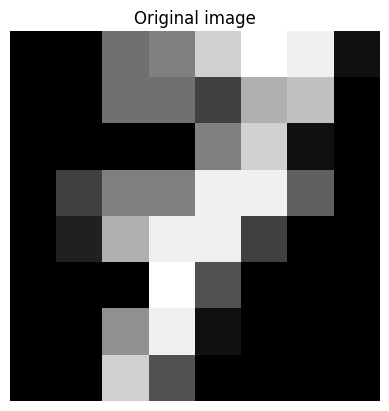

(8, 8) 0 255


In [70]:
plt.imshow(img, cmap="gray")
plt.title("Original image")
plt.axis("off")
plt.show()

print(img.shape, img.min(), img.max())

Min, Max after scaling: 0.0 16.0


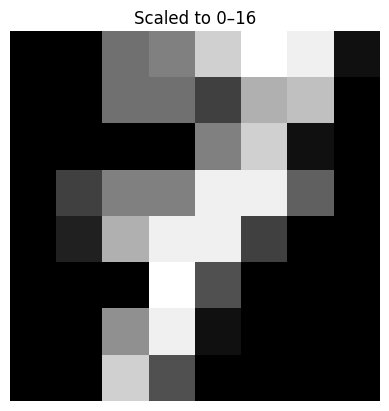

In [71]:
img_scaled = img.astype(np.float32) / 255.0 * 16.0

print("Min, Max after scaling:", img_scaled.min(), img_scaled.max())

plt.imshow(img_scaled, cmap="gray")
plt.title("Scaled to 0–16")
plt.axis("off")
plt.show()

In [72]:
img_flat = img_scaled.reshape(1, -1)
print("Final input shape:", img_flat.shape)

prediction = grid.predict(img_flat)
print("Predicted digit:", prediction[0])

Final input shape: (1, 64)
Predicted digit: 7


Prediction 2:

In [73]:
image_path = 'digits/digit_5.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

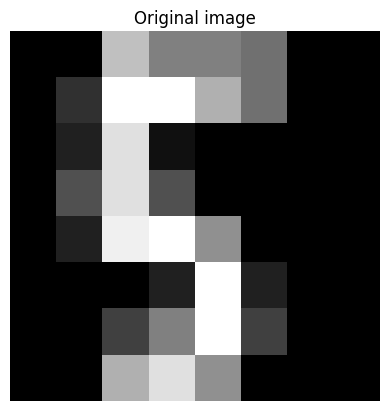

(8, 8) 0 255


In [74]:
plt.imshow(img, cmap="gray")
plt.title("Original image")
plt.axis("off")
plt.show()

print(img.shape, img.min(), img.max())

Min, Max after scaling: 0.0 16.0


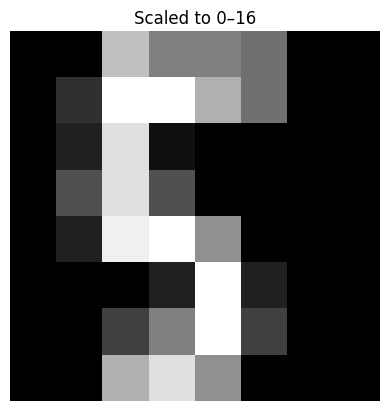

In [75]:
img_scaled = img.astype(np.float32) / 255.0 * 16.0

print("Min, Max after scaling:", img_scaled.min(), img_scaled.max())

plt.imshow(img_scaled, cmap="gray")
plt.title("Scaled to 0–16")
plt.axis("off")
plt.show()

In [76]:
img_flat = img_scaled.reshape(1, -1)
print("Final input shape:", img_flat.shape)

prediction = grid.predict(img_flat)
print("Predicted digit:", prediction[0])

Final input shape: (1, 64)
Predicted digit: 5
